<a href="https://colab.research.google.com/github/Thevaibhavraina/SPIT-LAB/blob/main/DA_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Vaibhav Raina

UID: 2018110040

Batch: A

Branch: BE ETRX

Objective: Building Linear regression model for given dataset

Data set Link: [Climate Change Dataset](https://www.kaggle.com/datasets/econdata/climate-change)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('climate_change.csv')

In [ ]:
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
data_train=data[data.Year<=2006]
data_test=data[data.Year>2006]

In [ ]:
data=data.drop(['Year','Month'],axis=1)
data_train=data_train.drop(['Year','Month'],axis=1)
data_test=data_test.drop(['Year','Month'],axis=1)

In [ ]:
data_train

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [ ]:
data_test

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372
289,-0.358,386.05,1781.81,320.332,246.881,537.376,1365.7616,0.0040,0.382
290,-0.290,384.49,1771.89,320.349,246.497,537.113,1365.7506,0.0040,0.394
291,-0.440,382.00,1779.38,320.471,246.307,537.125,1365.7566,0.0041,0.358
292,-1.162,380.90,1794.21,320.618,246.214,537.281,1365.7159,0.0042,0.402
293,-1.142,381.14,1802.38,320.855,246.189,537.380,1365.7388,0.0041,0.362


In [ ]:
data

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
data.isnull().sum()

MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = pd.DataFrame(data_train, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data_train['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_train, y_train) #Multiple R-squared

0.7508932770523429

In [ ]:
reg.score(X_test, y_test)

0.18377835333134962

In [ ]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-124.594260,0.000
MEI,0.064205,0.000
CO2,0.006457,0.005
CH4,0.000124,0.810
N2O,-0.016528,0.055
CFC-11,-0.006630,0.000
CFC-12,0.003808,0.000
TSI,0.093141,0.000
Aerosols,-1.537613,0.000


Q. Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05. (Select all that apply.) a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosols

Answer The p values for CH4 and N2O are greater than 0.05 hence indicating that these attributes are insignificant.

The sample size taken is the entire training sample. P value for CH4 = 0.810 P value for N2O = 0.055

Hence,

a) MEI b) CO2 e) CFC.11 f) CFC.12 g) TSI h) Aerosols are significant

In [ ]:
df_train = data_train.drop(['CH4','CO2'], axis = 1)

In [ ]:
df_train

,MEI,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...
279,0.759,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,0.793,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,0.892,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,1.292,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [ ]:
X_train_new = pd.DataFrame(df_train, columns=['MEI', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train_new=df_train['Temp']

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train_new, y_train_new)
reg.score(X_train_new, y_train_new)

0.7436548026578143

In [ ]:
df_test = data_test.drop(['CH4','CO2'], axis = 1)

In [ ]:
X_test_new = pd.DataFrame(df_test, columns=['MEI', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test_new=df_test['Temp']

In [ ]:
reg.score(X_test_new, y_test_new)

0.28950044082778204

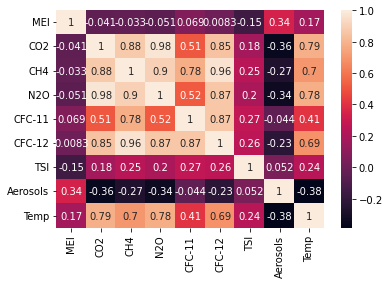

In [ ]:
Var_Corr = data_train.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True) #corr between year and dur (weak neg corr)

According to current scientific thinking, greenhouse gases—gases that are able to store solar heat and contribute to warming the Earth—include nitrous oxide and CFC-11. However, the N2O and CFC-11 variables' regression coefficients are both negative, showing that rising atmospheric concentrations of either of these two substances are linked to a decrease in world temperatures..

The possible explanations for the above statement are:

1) This regression study is a component of a disproof that N2O and CFC-11 are not greenhouse gases, as claimed by climatologists.
The aforementioned claim may be disproved since the data was model-fit and the coefficients of N2O and CH4 were found to be negative, validating the argument.

2) The regression coefficients being computed are inaccurate because there is insufficient data.
Given that the dataset employed for this analysis has a relatively low model test accuracy, the aforementioned assertion can be accepted.

3) N2O and CFC.11 are associated with other factors in the data set, and all gas concentration variables indicate human growth.
The correlation matrix demonstrates that N2O and CFC 11 are substantially linked with the other aspects of the dataset since the coefficient values are fairly high, supporting the aforementioned claim.